<a href="https://colab.research.google.com/github/dhanyab123/convolutetheworld/blob/main/Fruit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# Fruit Recognition

To build a convolution neural network which distinguishes between images of various fruits and vegetables with minimum accuracy of 60% on test data and run time of training below 6 minutes.

---

In [ ]:
# Install the kaggle library
!pip install -q kaggle 

# To upload the kaggle.json file
from google.colab import files
files.upload()

# Create kaggle folder
!mkdir ~/.kaggle

# Copy kaggle.json into folder kaggle
!cp kaggle.json ~/.kaggle

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json  

Saving kaggle.json to kaggle.json


In [ ]:
# To download the required dataset from kaggle
!kaggle datasets download -d sshikamaru/fruit-recognition

 91% 93.0M/102M [00:01<00:00, 54.2MB/s]
100% 102M/102M [00:01<00:00, 64.2MB/s] 


In [ ]:
# Unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [ ]:
import os

In [ ]:
# Assigning path for test and train data
TRAIN_DATA_PATH = '/content/train/train'
TEST_DATA_PATH = '/content/test/test'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data pre-processing

In [ ]:
total_image_per = 390
labels = []
train_image = []
img_size = 100
tot = {}

for category in os.listdir(TRAIN_DATA_PATH):
  if category not in tot:
    tot.update({category : 0})
  for item in os.listdir(TRAIN_DATA_PATH + '/' + category):
    if category in tot.keys():
      if tot.get(category) >= total_image_per:
        continue
      y = tot.pop(category) 
      tot.update({category : y+1})
      labels.append(category)

    img = image.load_img(TRAIN_DATA_PATH + '/' + category + '/' + str(item), target_size=(img_size, img_size))
    img = image.img_to_array(img)
    img = img/255.0
    train_image.append(img)

# Changing data into np arrays
label = np.array(labels)
X = np.array(train_image) 


In [ ]:
val = sorted(list(tot.keys()))
no = []

for i in label:
  for j in range(len(val)):
    if i == val[j]:
      no.append(j)

no = np.array(no)

In [ ]:
val

['Apple Braeburn',
 'Apple Granny Smith',
 'Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe',
 'Cherry',
 'Clementine',
 'Corn',
 'Cucumber Ripe',
 'Grape Blue',
 'Kiwi',
 'Lemon',
 'Limes',
 'Mango',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Pepper Green',
 'Pepper Red',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato Red',
 'Raspberry',
 'Strawberry',
 'Tomato',
 'Watermelon']

In [ ]:
# Checking the shape of the training image data
X[0].shape

(100, 100, 3)

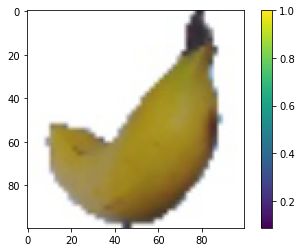

Banana


In [ ]:
# Viewing the train data and its resp. label
plt.imshow(X[90])
plt.colorbar()
plt.show()

print(label[90])

In [ ]:
# Checking the total number of possible labels
np.unique(no)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [ ]:
# Splitting data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, no, random_state=42)

Creating the Convolution Neural Network

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), activation='relu', input_shape = (100,100,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(33))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

In [ ]:
# Adding to Loss function
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
y_train.shape

(9652,)

In [ ]:
# Training the model
model.fit(X_train, y_train, epochs=2, batch_size=100)

Epoch 1/2
97/97 [==============================] - 77s 784ms/step - loss: 0.8479 - accuracy: 0.7598
Epoch 2/2
97/97 [==============================] - 76s 784ms/step - loss: 0.0596 - accuracy: 0.9818


In [ ]:
# Testing the model
model.evaluate(X_test, y_test)

101/101 [==============================] - 8s 76ms/step - loss: 0.2165 - accuracy: 0.9251


[0.21654634177684784, 0.925108790397644]

In [ ]:
# Checking size of testing dataset
len(y_test)

3218

Viewing output results

In [ ]:
# Predicting output for the test data
predictions = model.predict(X_test)

Grape Blue


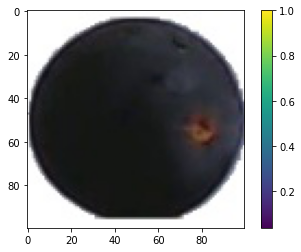

'Grape Blue'

In [ ]:
# To get the prediction for the data and the input
num = 90

print(val[np.argmax(predictions[num])])

plt.imshow(X_test[num])
plt.colorbar()
plt.show()
val[y_test[num]]